# **Neural Architecture Search with AutoKeras**
**CSCE 670 - Harshul Soni**

The purpose of this Spotlight is to indroduce AutoKeras, a framework developed by Data lab at Texas A&M University. It is an open source alternative to Google's AutoML.
In 2017, Google released a framework 'AutoML' to automatically detect the best neural architectures for a given dataset. The service is being offered at a rate of $20/hr. 

## What is Neural Architecture Search (NAS)

When training a neural network on a dataset there are two primary objectives a deep learning practitioner is trying to optimize and balance:

* Establishing a Neural Architecture that works for the given dataset.
* Tuning the hyperparameters in such a way so as to produce a model with acceptable predictions and having generalizing capability for data outside the training datasets. Typical hyperparameters that need to be tuned include:
    * the optimizer algorithm (SGD, Adam, etc.)
    * learning rate and learning rate scheduling
    * regularization
    
A machine learning expert can take about hundreds of trails to find a good neural architecture with satisfying hyperparametrs. These trails can add up to hundreds to thousands of hours in GPU compute time.

NAS finds the best architecture from all possible architectures by following a search strategy that will maximize the performance.
<a href="https://ibb.co/X2CkkmB"><img src="https://i.ibb.co/Gx533gw/download.png" alt="download" border="0"></a>

In the context of Deep Learning, a Neural Architecture Search algorithm will:

* Accept an input training dataset
* Optimize and find architectural building blocks called “cells” — these cells are automatically learned
* Continually train and search the “NAS search space” for more optimized cells

The goal of Auto-ML and AutoKeras is to enable newcomers in data science wth minimal domain-knowledge to become friendly with deep neural model with Automated Machine learning. This is done through the help of Neural Architecture Search.

## What is automated machine learning? 

According to www.automl.org, automated machine learning can be defined as a way of automating the tasks of: (https://www.automl.org/automl/):
* Preprocess and clean the data.
* Select and construct appropriate features.
* Select an appropriate model family.
* Optimize model hyperparameters.
* Postprocess machine learning models.
* Critically analyze the results obtained.

Enter AutoKeras. The Data Lab led by Dr. Xia Ben Hu at Texas A&M University developed an open source framework built with Keras to bring NAS to any Novice python user. This tool provides techinques used by large scale companies and is available as an open source library on github. Hence, this tool can be used by beginner data scientists to achieve results comparable to large competitors like Google, Microsoft, etc. 





# Installation Required

In [ ]:
!pip install autokeras
!pip install tensorflow==2.1.0
!pip install keras==2.3.1

# Imports

In [0]:
#from __future__ import print_function
from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical   
from autokeras import ImageClassifier

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

import numpy as np
from tensorflow.keras.datasets import imdb
import autokeras as ak

Using TensorFlow backend.


# MNIST with Keras

For showing the difference between the coding required for a simple image classification task, we'll first explore Keras and then compare the approach with AutoKeras. Here, the task selected is classifying hand written digits in MNIST dataset.

In [0]:
batch_size = 256
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# get data from dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1).astype('float32')/255
input_shape = (img_rows, img_cols, 1)

print('x_train shape:', x_train.shape)
print('train samples:', x_train.shape[0])
print('test samples:', x_test.shape[0])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
y = model.predict_classes(x_test)
y = to_categorical(y, num_classes=10)
reportKeras = classification_report(y, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
train samples: 60000
test samples: 10000
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 75us/step
Test loss: 0.07062808377761394
Test accuracy: 0.9779999852180481


As we can see, Keras needs the user to have domain knowledge to construct the model. We get an average accuracy of 99.2 percent. Since is it not possible for beginners in machine learning to have such a domain knowledge, next we'll look how autokeras can be used to solve this issue.

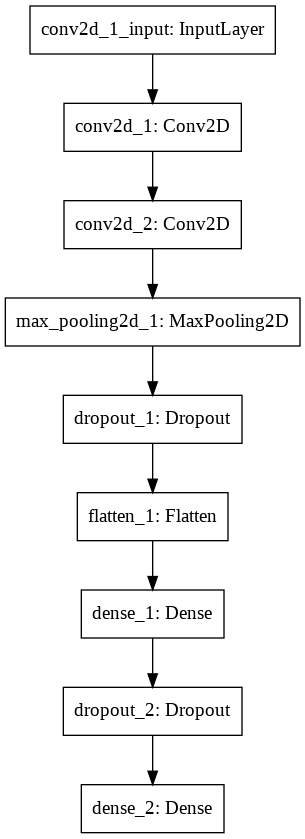

In [0]:
keras.utils.plot_model(model, 'Keras Model.png')

# MNIST with AutoKeras: Image Classification/Regression

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# max_trials give the total number of architectures to be tried
clf = ak.ImageClassifier(max_trials=10)
clf.fit(x_train, y_train, epochs = 10)
score = clf.evaluate(x_test, y_test)
# print(y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train for 1500 steps, validate for 375 steps
Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1735 - accuracy: 0.9465 - val_loss: 0.0620 - val_accuracy: 0.9827
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0768 - accuracy: 0.9756 - val_loss: 0.0514 - val_accuracy: 0.9846
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0620 - accuracy: 0.9809 - val_loss: 0.0435 - val_accuracy: 0.9874
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0529 - accuracy: 0.9828 - val_loss: 0.0433 - val_accuracy: 0.9878
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0501 - accuracy: 0.9836 - val_loss: 0.0432 - val_accuracy: 0.9876
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0435 - accuracy: 0.9854 - val_loss: 0.0422 - val_accuracy: 0.9881
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0395 - accura

Train for 1500 steps, validate for 375 steps
Epoch 1/10
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2587 - accuracy: 0.9309 - val_loss: 1.1311 - val_accuracy: 0.8743
Epoch 2/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0996 - accuracy: 0.9732 - val_loss: 0.0760 - val_accuracy: 0.9807
Epoch 3/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.1312 - accuracy: 0.9685 - val_loss: 0.0706 - val_accuracy: 0.9796
Epoch 4/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0708 - accuracy: 0.9813 - val_loss: 0.0604 - val_accuracy: 0.9831
Epoch 5/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0754 - accuracy: 0.9796 - val_loss: 0.0622 - val_accuracy: 0.9825
Epoch 6/10
1500/1500 [==============================] - 59s 40ms/step - loss: 0.0494 - accuracy: 0.9866 - val_loss: 0.0585 - val_accuracy: 0.9830
Epoch 7/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0

Train for 1500 steps, validate for 375 steps
Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1777 - accuracy: 0.9455 - val_loss: 0.0747 - val_accuracy: 0.9781
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0773 - accuracy: 0.9761 - val_loss: 0.0531 - val_accuracy: 0.9841
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0626 - accuracy: 0.9805 - val_loss: 0.0477 - val_accuracy: 0.9865
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0531 - accuracy: 0.9832 - val_loss: 0.0457 - val_accuracy: 0.9871
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0489 - accuracy: 0.9837 - val_loss: 0.0446 - val_accuracy: 0.9883
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0425 - accuracy: 0.9863 - val_loss: 0.0449 - val_accuracy: 0.9877
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0402 - accura

INFO:tensorflow:Oracle triggered exit
Train for 1875 steps, validate for 375 steps
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1521 - accuracy: 0.9535 - val_loss: 0.0417 - val_accuracy: 0.9868
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0719 - accuracy: 0.9782 - val_loss: 0.0302 - val_accuracy: 0.9913
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0583 - accuracy: 0.9827 - val_loss: 0.0205 - val_accuracy: 0.9942
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0505 - accuracy: 0.9837 - val_loss: 0.0168 - val_accuracy: 0.9952
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0455 - accuracy: 0.9854 - val_loss: 0.0124 - val_accuracy: 0.9968
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0120 - val_accuracy: 0.9959
Epoch 7/10
1875/1875 [=============================

As we can see, it takes a long time to train and find a good neural architecture. We have also achieved accuracy comparable to the Domain specific keras model. We can see that autoKeras doesn't require specific domain knowledge by the user.

To evaluate the above two approaches, we'll use classification_report from sklearn

In [0]:
reportautoKeras = classification_report(clf.predict(x_test), y_test)
print("Autokeras classification report")
print(reportautoKeras)

Autokeras classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       987
           1       1.00      0.99      0.99      1139
           2       0.99      0.97      0.98      1054
           3       0.99      1.00      0.99      1001
           4       0.98      1.00      0.99       969
           5       0.99      0.98      0.99       903
           6       0.98      0.99      0.99       953
           7       0.98      0.99      0.98      1015
           8       0.98      0.99      0.99       967
           9       0.98      0.98      0.98      1012

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
print("Keras classification report")
print(reportKeras)

Keras classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       988
           1       0.99      0.99      0.99      1136
           2       0.96      0.98      0.97      1014
           3       0.98      0.97      0.98      1019
           4       0.98      0.98      0.98       983
           5       0.98      0.99      0.98       886
           6       0.98      0.99      0.98       952
           7       0.98      0.98      0.98      1028
           8       0.98      0.94      0.96      1013
           9       0.96      0.99      0.97       981

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



# Exporting the best Neural Architecture

To export the best neural model, simply use <MODEL>.export_model(). This returns a tensorflow modelof type <class 'tensorflow.python.keras.engine.training.Model'> which can then be moved to production for large scale deployment.

This exported model can be ploted and visualized by using plot_model in tensorflow.keras.utils

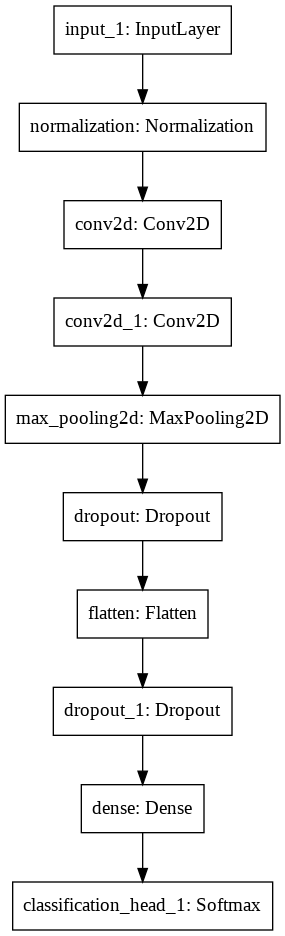

In [0]:
autoKerasExportedModel = clf.export_model()
plot_model(autoKerasExportedModel, 'AutoKeras Best Model.png')

# Supported Tasks

AutoKeras uses state-of-the-art NAS algorithms, along with existing preprocessing blocks to insure smooth NAS trainings sessions. This is laid out extensively in the AutoKeras Paper. Furthermore, the algorithms are optimized for dynamic GPU memories to avoid the OOM (Out of Memory) Exceptions we are all used to. AutoKeras supports many task with simple API interfaces:

* Image Classification/Regression
* Text Classification/Regression
* Structured DataClassification/Regression(row x column datatypes, or a csv file)
* Multi-Task Learning

# Text Classification/Regression

As described in the AutoKeras, we'll also be using the imdb dataset to show the impact of AutoKeras in Text Classification. The first step is to process the data, so that it can act as an input to the classifier.



In [0]:
# Load the integer sequence the IMDB dataset with Keras.
index_offset = 3  # word index offset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000,
                                                      index_from=index_offset)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Prepare the dictionary of index to word.
word_to_id = imdb.get_word_index()
word_to_id = {k: (v + index_offset) for k, v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
id_to_word = {value: key for key, value in word_to_id.items()}

# Convert the word indices to words.
x_train = list(map(lambda sentence: ' '.join(
    id_to_word[i] for i in sentence), x_train))
x_test = list(map(lambda sentence: ' '.join(
    id_to_word[i] for i in sentence), x_test))
x_train = np.array(x_train, dtype=np.str)
x_test = np.array(x_test, dtype=np.str)
print("Training set shape:", x_train.shape)
print("Test set shape:", y_train.shape) 

1646592/1641221 [==============================] - 0s 0us/step
Training set shape: (25000,)
Test set shape: (25000, 1)


In [0]:
clf = ak.TextClassifier(max_trials=10)
clf.fit(x_train, y_train, epochs=10)
predicted_y = clf.predict(x_test)
#print(clf.evaluate(x_test, y_test))
score = clf.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train for 625 steps, validate for 157 steps
Epoch 1/10
625/625 [==============================] - 17s 27ms/step - loss: 0.4799 - accuracy: 0.7466 - val_loss: 0.3296 - val_accuracy: 0.8540
Epoch 2/10
625/625 [==============================] - 16s 25ms/step - loss: 0.3121 - accuracy: 0.8696 - val_loss: 0.3015 - val_accuracy: 0.8718
Epoch 3/10
625/625 [==============================] - 15s 24ms/step - loss: 0.2567 - accuracy: 0.8972 - val_loss: 0.3007 - val_accuracy: 0.8806
Epoch 4/10
625/625 [==============================] - 16s 25ms/step - loss: 0.2123 - accuracy: 0.9170 - val_loss: 0.3125 - val_accuracy: 0.8756
Epoch 5/10
625/625 [==============================] - 15s 24ms/step - loss: 0.1747 - accuracy: 0.9332 - val_loss: 0.3484 - val_accuracy: 0.8714
Epoch 6/10
625/625 [==============================] - 15s 25ms/step - loss: 0.1487 - accuracy: 0.9428 - val_loss: 0.3743 - val_accuracy: 0.8746
Epoch 7/10
625/625 [==============================] - 15s 24ms/step - loss: 0.1324 - accurac

Train for 625 steps, validate for 157 steps
Epoch 1/10
625/625 [==============================] - 16s 26ms/step - loss: 0.4787 - accuracy: 0.7492 - val_loss: 0.3309 - val_accuracy: 0.8554
Epoch 2/10
625/625 [==============================] - 16s 25ms/step - loss: 0.3106 - accuracy: 0.8711 - val_loss: 0.3060 - val_accuracy: 0.8720
Epoch 3/10
625/625 [==============================] - 15s 25ms/step - loss: 0.2587 - accuracy: 0.8941 - val_loss: 0.3128 - val_accuracy: 0.8694
Epoch 4/10
625/625 [==============================] - 16s 25ms/step - loss: 0.2124 - accuracy: 0.9189 - val_loss: 0.3275 - val_accuracy: 0.8706
Epoch 5/10
625/625 [==============================] - 15s 25ms/step - loss: 0.1776 - accuracy: 0.9309 - val_loss: 0.3549 - val_accuracy: 0.8752
Epoch 6/10
625/625 [==============================] - 16s 25ms/step - loss: 0.1447 - accuracy: 0.9463 - val_loss: 0.3650 - val_accuracy: 0.8778
Epoch 7/10
625/625 [==============================] - 16s 25ms/step - loss: 0.1204 - accurac

INFO:tensorflow:Oracle triggered exit
Train for 782 steps, validate for 157 steps
Epoch 1/10
782/782 [==============================] - 20s 25ms/step - loss: 0.4497 - accuracy: 0.7707 - val_loss: 0.2375 - val_accuracy: 0.9106
Epoch 2/10
782/782 [==============================] - 19s 24ms/step - loss: 0.3006 - accuracy: 0.8766 - val_loss: 0.1854 - val_accuracy: 0.9382
Epoch 3/10
782/782 [==============================] - 19s 24ms/step - loss: 0.2537 - accuracy: 0.8984 - val_loss: 0.1408 - val_accuracy: 0.9576
Epoch 4/10
782/782 [==============================] - 19s 24ms/step - loss: 0.2106 - accuracy: 0.9198 - val_loss: 0.0992 - val_accuracy: 0.9708
Epoch 5/10
782/782 [==============================] - 19s 24ms/step - loss: 0.1827 - accuracy: 0.9315 - val_loss: 0.0709 - val_accuracy: 0.9816
Epoch 6/10
782/782 [==============================] - 19s 25ms/step - loss: 0.1544 - accuracy: 0.9413 - val_loss: 0.0486 - val_accuracy: 0.9904
Epoch 7/10
782/782 [==============================] - 

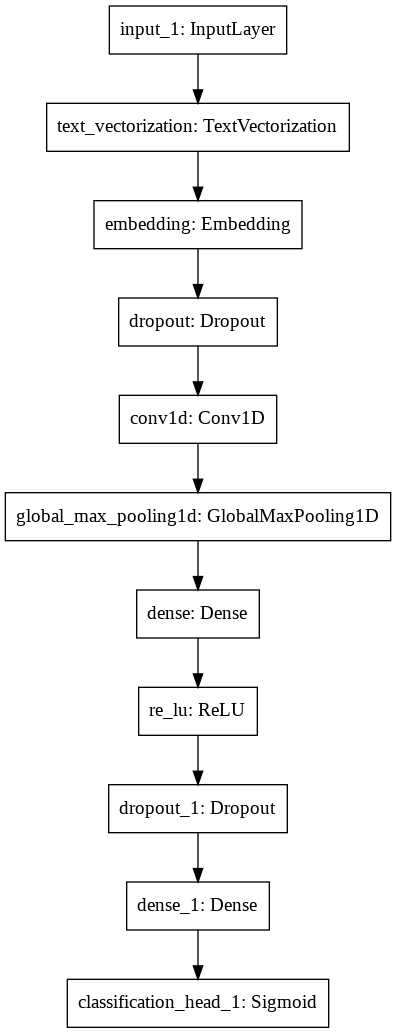

In [0]:
autoKerasTextModel = clf.export_model()
plot_model(autoKerasTextModel, 'AutoKeras Text Best Model.png')

# Structured Data Classififcation/Regression



## Downloading the dataset

In [3]:
! wget https://raw.githubusercontent.com/keras-team/autokeras/master/tests/fixtures/titanic/eval.csv
! wget https://raw.githubusercontent.com/keras-team/autokeras/master/tests/fixtures/titanic/train.csv

--2020-03-06 11:42:56--  https://raw.githubusercontent.com/keras-team/autokeras/master/tests/fixtures/titanic/eval.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13049 (13K) [text/plain]
Saving to: ‘eval.csv’

eval.csv            100%[===================>]  12.74K  --.-KB/s    in 0.007s  

2020-03-06 11:42:56 (1.81 MB/s) - ‘eval.csv’ saved [13049/13049]

--2020-03-06 11:42:56--  https://raw.githubusercontent.com/keras-team/autokeras/master/tests/fixtures/titanic/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30874 (30K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[==============

## Running the Autokeras trainer

In [0]:
clf = ak.StructuredDataClassifier(max_trials=5)
# here x = The path to the train.csv file.
# here y = label of target column
# x and y can be numpy arrays as well
clf.fit(x = 'train.csv', y='survived', epochs=10)
predicted_y = clf.predict('eval.csv')
#print(clf.evaluate(x = '/content/eval.csv', 'survived'))
score = clf.evaluate(x = 'eval.csv', y='survived')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train for 16 steps, validate for 4 steps
Epoch 1/10
16/16 [==============================] - 1s 38ms/step - loss: 1.4087 - accuracy: 0.6375 - val_loss: 0.7840 - val_accuracy: 0.5920
Epoch 2/10
16/16 [==============================] - 0s 10ms/step - loss: 0.9683 - accuracy: 0.5737 - val_loss: 0.5535 - val_accuracy: 0.7200
Epoch 3/10
16/16 [==============================] - 0s 15ms/step - loss: 0.6943 - accuracy: 0.6355 - val_loss: 0.5505 - val_accuracy: 0.7360
Epoch 4/10
16/16 [==============================] - 0s 7ms/step - loss: 0.6406 - accuracy: 0.6474 - val_loss: 0.5294 - val_accuracy: 0.7280
Epoch 5/10
16/16 [==============================] - 0s 10ms/step - loss: 0.6057 - accuracy: 0.6813 - val_loss: 0.5220 - val_accuracy: 0.7520
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 0.6105 - accuracy: 0.6673 - val_loss: 0.5246 - val_accuracy: 0.7520
Epoch 7/10
16/16 [==============================] - 0s 6ms/step - loss: 0.6091 - accuracy: 0.6713 - val_loss: 0.522

Train for 16 steps, validate for 4 steps
Epoch 1/10
16/16 [==============================] - 1s 40ms/step - loss: 1.4925 - accuracy: 0.5956 - val_loss: 0.9052 - val_accuracy: 0.3680
Epoch 2/10
16/16 [==============================] - 0s 10ms/step - loss: 1.0690 - accuracy: 0.5777 - val_loss: 0.6772 - val_accuracy: 0.6960
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 1.0922 - accuracy: 0.5438 - val_loss: 0.5789 - val_accuracy: 0.6960
Epoch 4/10
16/16 [==============================] - 0s 11ms/step - loss: 1.1105 - accuracy: 0.5398 - val_loss: 0.5365 - val_accuracy: 0.7360
Epoch 5/10
16/16 [==============================] - 0s 15ms/step - loss: 0.7715 - accuracy: 0.6255 - val_loss: 0.5135 - val_accuracy: 0.7440
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 0.9280 - accuracy: 0.5837 - val_loss: 0.5419 - val_accuracy: 0.6960
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 0.8938 - accuracy: 0.6056 - val_loss: 0.567

Train for 16 steps, validate for 4 steps
Epoch 1/10
16/16 [==============================] - 1s 45ms/step - loss: 0.7925 - accuracy: 0.5916 - val_loss: 0.5303 - val_accuracy: 0.7040
Epoch 2/10
16/16 [==============================] - 0s 10ms/step - loss: 0.6739 - accuracy: 0.6295 - val_loss: 0.5137 - val_accuracy: 0.7440
Epoch 3/10
16/16 [==============================] - 0s 6ms/step - loss: 0.6646 - accuracy: 0.6753 - val_loss: 0.5105 - val_accuracy: 0.7360
Epoch 4/10
16/16 [==============================] - 0s 6ms/step - loss: 0.6224 - accuracy: 0.6952 - val_loss: 0.5199 - val_accuracy: 0.7120
Epoch 5/10
16/16 [==============================] - 0s 6ms/step - loss: 0.6722 - accuracy: 0.6753 - val_loss: 0.5356 - val_accuracy: 0.6800
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 0.5901 - accuracy: 0.7092 - val_loss: 0.5013 - val_accuracy: 0.7440
Epoch 7/10
16/16 [==============================] - 0s 9ms/step - loss: 0.6103 - accuracy: 0.7112 - val_loss: 0.4885 

Train for 16 steps, validate for 4 steps
Epoch 1/10
16/16 [==============================] - 1s 37ms/step - loss: 0.6820 - accuracy: 0.6394 - val_loss: 0.5704 - val_accuracy: 0.7200
Epoch 2/10
16/16 [==============================] - 0s 6ms/step - loss: 0.6593 - accuracy: 0.6494 - val_loss: 0.5942 - val_accuracy: 0.7200
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6434 - val_loss: 0.5581 - val_accuracy: 0.7120
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6258 - accuracy: 0.6773 - val_loss: 0.5542 - val_accuracy: 0.7200
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6198 - accuracy: 0.6673 - val_loss: 0.5430 - val_accuracy: 0.7200
Epoch 6/10
16/16 [==============================] - 0s 8ms/step - loss: 0.6126 - accuracy: 0.6713 - val_loss: 0.5340 - val_accuracy: 0.7280
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6037 - accuracy: 0.6793 - val_loss: 0.5289 -

Train for 16 steps, validate for 4 steps
Epoch 1/10
16/16 [==============================] - 1s 46ms/step - loss: 0.7112 - accuracy: 0.5936 - val_loss: 1.0621 - val_accuracy: 0.3680
Epoch 2/10
16/16 [==============================] - 0s 10ms/step - loss: 0.6541 - accuracy: 0.6534 - val_loss: 0.6643 - val_accuracy: 0.5440
Epoch 3/10
16/16 [==============================] - 0s 14ms/step - loss: 0.6270 - accuracy: 0.6813 - val_loss: 0.5716 - val_accuracy: 0.7680
Epoch 4/10
16/16 [==============================] - 0s 6ms/step - loss: 0.6106 - accuracy: 0.6873 - val_loss: 0.5515 - val_accuracy: 0.7440
Epoch 5/10
16/16 [==============================] - 0s 6ms/step - loss: 0.5991 - accuracy: 0.7012 - val_loss: 0.5311 - val_accuracy: 0.7680
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 0.5877 - accuracy: 0.6972 - val_loss: 0.5206 - val_accuracy: 0.7600
Epoch 7/10
16/16 [==============================] - 0s 7ms/step - loss: 0.5797 - accuracy: 0.7012 - val_loss: 0.5144

INFO:tensorflow:Oracle triggered exit
Train for 20 steps, validate for 4 steps
Epoch 1/10
20/20 [==============================] - 1s 27ms/step - loss: 5.2696 - accuracy: 0.3876 - val_loss: 1.0674 - val_accuracy: 0.3600
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 1.1522 - accuracy: 0.5917 - val_loss: 0.6298 - val_accuracy: 0.7440
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.8182 - accuracy: 0.6667 - val_loss: 0.5625 - val_accuracy: 0.7280
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6822 - accuracy: 0.6491 - val_loss: 0.5840 - val_accuracy: 0.7440
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6534 - accuracy: 0.6459 - val_loss: 0.5414 - val_accuracy: 0.7440
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6383 - accuracy: 0.6539 - val_loss: 0.5307 - val_accuracy: 0.7360
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6329 -

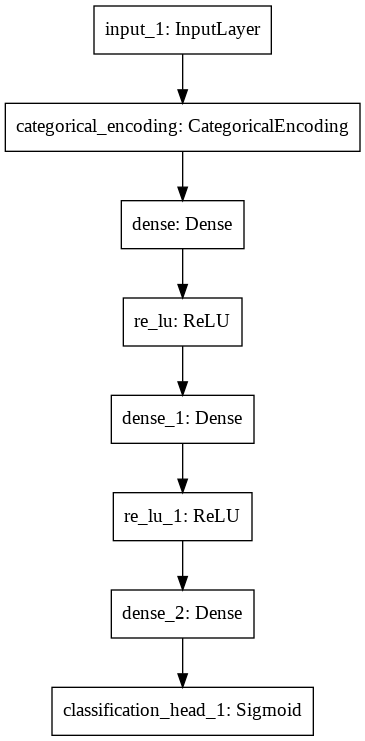

In [0]:
autoKerasStructuredModel = clf.export_model()
plot_model(autoKerasStructuredModel, 'AutoKeras Structured Best Model.png')

# Multi-Modal and Multi-Task Learning

This refers to presence of multiple types of data in the dataset. Example, a image can have metadata in addition to the image data. This meta data can also be use for the classification and regression tasks. Moreover, this multi modality of data results in better understanding of the data and can be used to create better neural architectures. Taking the example presented in the official documentation, the image input along with the structured metadata is classified into the correct class and also the quality is regressed between 0 and 1.

<img src="https://i.ibb.co/ZKKCJnw/Screenshot-from-2020-03-03-02-12-13.png" alt="Screenshot-from-2020-03-03-02-12-13" border="0">


In [0]:
num_instances = 1000
num_classes = 3
# Generate random image data, structured data.
x_image = np.random.rand(num_instances, 32, 32, 3).astype(np.float32)
x_structured = np.random.rand(num_instances, 20).astype(np.float32)

# Also generate random regression and classification targets
y_regression = np.random.rand(num_instances, 1).astype(np.float32)
y_classification = np.random.randint(num_classes, size=num_instances)

In [0]:
# Initialize the multi with multiple inputs and outputs.
clf = ak.AutoModel(
    inputs=[ak.ImageInput(), ak.StructuredDataInput()],
    outputs=[
        ak.RegressionHead(metrics=['mean_squared_error']),
        ak.ClassificationHead(num_classes=num_classes, loss='categorical_crossentropy', metrics='accuracy')
    ],
    max_trials=10)

clf.fit(
    [x_image, x_structured],
    [y_regression, y_classification],
    epochs=10)

Train for 25 steps, validate for 7 steps
Epoch 1/10
25/25 [==============================] - 1s 47ms/step - loss: 1.2144 - regression_head_1_loss: 0.1055 - classification_head_1_loss: 1.1089 - regression_head_1_mean_squared_error: 0.1055 - classification_head_1_accuracy: 0.3313 - val_loss: 1.1730 - val_regression_head_1_loss: 0.0826 - val_classification_head_1_loss: 1.0905 - val_regression_head_1_mean_squared_error: 0.0804 - val_classification_head_1_accuracy: 0.3700
Epoch 2/10
25/25 [==============================] - 0s 9ms/step - loss: 1.1905 - regression_head_1_loss: 0.0917 - classification_head_1_loss: 1.0989 - regression_head_1_mean_squared_error: 0.0917 - classification_head_1_accuracy: 0.3650 - val_loss: 1.1827 - val_regression_head_1_loss: 0.0901 - val_classification_head_1_loss: 1.0927 - val_regression_head_1_mean_squared_error: 0.0856 - val_classification_head_1_accuracy: 0.3600
Epoch 3/10
25/25 [==============================] - 0s 9ms/step - loss: 1.1786 - regression_head_1

Train for 25 steps, validate for 7 steps
Epoch 1/10
25/25 [==============================] - 3s 112ms/step - loss: 14.2468 - regression_head_1_loss: 12.9721 - classification_head_1_loss: 1.2747 - regression_head_1_mean_squared_error: 12.9721 - classification_head_1_accuracy: 0.3300 - val_loss: 1.3221 - val_regression_head_1_loss: 0.2217 - val_classification_head_1_loss: 1.1004 - val_regression_head_1_mean_squared_error: 0.2017 - val_classification_head_1_accuracy: 0.3500
Epoch 2/10
25/25 [==============================] - 1s 28ms/step - loss: 2.7131 - regression_head_1_loss: 1.7073 - classification_head_1_loss: 1.0058 - regression_head_1_mean_squared_error: 1.7073 - classification_head_1_accuracy: 0.5350 - val_loss: 1.3319 - val_regression_head_1_loss: 0.2319 - val_classification_head_1_loss: 1.1000 - val_regression_head_1_mean_squared_error: 0.2112 - val_classification_head_1_accuracy: 0.3800
Epoch 3/10
25/25 [==============================] - 1s 27ms/step - loss: 3.6934 - regression_

Train for 25 steps, validate for 7 steps
Epoch 1/10
25/25 [==============================] - 8s 308ms/step - loss: 3.9644 - regression_head_1_loss: 2.4624 - classification_head_1_loss: 1.5020 - regression_head_1_mean_squared_error: 2.4624 - classification_head_1_accuracy: 0.3550 - val_loss: 1.2654 - val_regression_head_1_loss: 0.1672 - val_classification_head_1_loss: 1.0982 - val_regression_head_1_mean_squared_error: 0.1575 - val_classification_head_1_accuracy: 0.3300
Epoch 2/10
25/25 [==============================] - 2s 82ms/step - loss: 2.1004 - regression_head_1_loss: 0.8000 - classification_head_1_loss: 1.3004 - regression_head_1_mean_squared_error: 0.8000 - classification_head_1_accuracy: 0.3975 - val_loss: 1.2325 - val_regression_head_1_loss: 0.1206 - val_classification_head_1_loss: 1.1120 - val_regression_head_1_mean_squared_error: 0.1129 - val_classification_head_1_accuracy: 0.3350
Epoch 3/10
25/25 [==============================] - 1s 45ms/step - loss: 1.0545 - regression_hea

Train for 25 steps, validate for 7 steps
Epoch 1/10
25/25 [==============================] - 9s 364ms/step - loss: 4.1925 - regression_head_1_loss: 2.7021 - classification_head_1_loss: 1.4904 - regression_head_1_mean_squared_error: 2.7021 - classification_head_1_accuracy: 0.3388 - val_loss: 1.3522 - val_regression_head_1_loss: 0.2539 - val_classification_head_1_loss: 1.0983 - val_regression_head_1_mean_squared_error: 0.2337 - val_classification_head_1_accuracy: 0.3550
Epoch 2/10
25/25 [==============================] - 2s 93ms/step - loss: 2.6776 - regression_head_1_loss: 1.2722 - classification_head_1_loss: 1.4054 - regression_head_1_mean_squared_error: 1.2722 - classification_head_1_accuracy: 0.3587 - val_loss: 1.1937 - val_regression_head_1_loss: 0.0862 - val_classification_head_1_loss: 1.1075 - val_regression_head_1_mean_squared_error: 0.0891 - val_classification_head_1_accuracy: 0.2950
Epoch 3/10
25/25 [==============================] - 1s 49ms/step - loss: 1.7731 - regression_hea

Train for 25 steps, validate for 7 steps
Epoch 1/10
25/25 [==============================] - 4s 159ms/step - loss: 9.8743 - regression_head_1_loss: 7.6074 - classification_head_1_loss: 2.2668 - regression_head_1_mean_squared_error: 7.6074 - classification_head_1_accuracy: 0.3275 - val_loss: 1.4822 - val_regression_head_1_loss: 0.1966 - val_classification_head_1_loss: 1.2856 - val_regression_head_1_mean_squared_error: 0.2054 - val_classification_head_1_accuracy: 0.4000
Epoch 2/10
25/25 [==============================] - 2s 66ms/step - loss: 1.3067 - regression_head_1_loss: 0.4432 - classification_head_1_loss: 0.8635 - regression_head_1_mean_squared_error: 0.4432 - classification_head_1_accuracy: 0.5788 - val_loss: 2.9023 - val_regression_head_1_loss: 1.2888 - val_classification_head_1_loss: 1.6135 - val_regression_head_1_mean_squared_error: 1.2964 - val_classification_head_1_accuracy: 0.3400
Epoch 3/10
25/25 [==============================] - 2s 68ms/step - loss: 0.8096 - regression_hea

Train for 25 steps, validate for 7 steps
Epoch 1/10
25/25 [==============================] - 15s 618ms/step - loss: 4.0455 - regression_head_1_loss: 2.5259 - classification_head_1_loss: 1.5196 - regression_head_1_mean_squared_error: 2.5259 - classification_head_1_accuracy: 0.3375 - val_loss: 20.4776 - val_regression_head_1_loss: 17.7808 - val_classification_head_1_loss: 2.6968 - val_regression_head_1_mean_squared_error: 17.5429 - val_classification_head_1_accuracy: 0.3700
Epoch 2/10
25/25 [==============================] - 2s 78ms/step - loss: 2.0351 - regression_head_1_loss: 0.8103 - classification_head_1_loss: 1.2249 - regression_head_1_mean_squared_error: 0.8103 - classification_head_1_accuracy: 0.4400 - val_loss: 50.3195 - val_regression_head_1_loss: 21.8195 - val_classification_head_1_loss: 28.5000 - val_regression_head_1_mean_squared_error: 21.9185 - val_classification_head_1_accuracy: 0.3700
Epoch 3/10
25/25 [==============================] - 2s 76ms/step - loss: 1.1325 - regres

Train for 25 steps, validate for 7 steps
Epoch 1/10
25/25 [==============================] - 9s 370ms/step - loss: 3.2673 - regression_head_1_loss: 1.8064 - classification_head_1_loss: 1.4609 - regression_head_1_mean_squared_error: 1.8064 - classification_head_1_accuracy: 0.3487 - val_loss: 1.3071 - val_regression_head_1_loss: 0.2095 - val_classification_head_1_loss: 1.0976 - val_regression_head_1_mean_squared_error: 0.1898 - val_classification_head_1_accuracy: 0.3550
Epoch 2/10
25/25 [==============================] - 1s 52ms/step - loss: 1.7436 - regression_head_1_loss: 0.4343 - classification_head_1_loss: 1.3093 - regression_head_1_mean_squared_error: 0.4343 - classification_head_1_accuracy: 0.3800 - val_loss: 1.3956 - val_regression_head_1_loss: 0.2963 - val_classification_head_1_loss: 1.0993 - val_regression_head_1_mean_squared_error: 0.2732 - val_classification_head_1_accuracy: 0.3300
Epoch 3/10
25/25 [==============================] - 1s 50ms/step - loss: 1.0145 - regression_hea

Train for 25 steps, validate for 7 steps
Epoch 1/10
25/25 [==============================] - 25s 1s/step - loss: 11.6085 - regression_head_1_loss: 9.9082 - classification_head_1_loss: 1.7003 - regression_head_1_mean_squared_error: 9.9082 - classification_head_1_accuracy: 0.3562 - val_loss: 1.8912 - val_regression_head_1_loss: 0.7944 - val_classification_head_1_loss: 1.0967 - val_regression_head_1_mean_squared_error: 0.7590 - val_classification_head_1_accuracy: 0.3700
Epoch 2/10
25/25 [==============================] - 6s 244ms/step - loss: 1.9654 - regression_head_1_loss: 0.4739 - classification_head_1_loss: 1.4915 - regression_head_1_mean_squared_error: 0.4739 - classification_head_1_accuracy: 0.3812 - val_loss: 1.2177 - val_regression_head_1_loss: 0.1151 - val_classification_head_1_loss: 1.1026 - val_regression_head_1_mean_squared_error: 0.1064 - val_classification_head_1_accuracy: 0.3350
Epoch 3/10
25/25 [==============================] - 13s 505ms/step - loss: 1.5767 - regression_h

Train for 25 steps, validate for 7 steps
Epoch 1/10
25/25 [==============================] - 1s 56ms/step - loss: 1.2387 - regression_head_1_loss: 0.1329 - classification_head_1_loss: 1.1058 - regression_head_1_mean_squared_error: 0.1329 - classification_head_1_accuracy: 0.3575 - val_loss: 1.2499 - val_regression_head_1_loss: 0.1495 - val_classification_head_1_loss: 1.1004 - val_regression_head_1_mean_squared_error: 0.1371 - val_classification_head_1_accuracy: 0.3200
Epoch 2/10
25/25 [==============================] - 0s 17ms/step - loss: 1.1478 - regression_head_1_loss: 0.0862 - classification_head_1_loss: 1.0616 - regression_head_1_mean_squared_error: 0.0862 - classification_head_1_accuracy: 0.4825 - val_loss: 1.2688 - val_regression_head_1_loss: 0.1701 - val_classification_head_1_loss: 1.0987 - val_regression_head_1_mean_squared_error: 0.1564 - val_classification_head_1_accuracy: 0.3500
Epoch 3/10
25/25 [==============================] - 0s 17ms/step - loss: 1.1036 - regression_head

Train for 25 steps, validate for 7 steps
Epoch 1/10
25/25 [==============================] - 9s 340ms/step - loss: 15.0699 - regression_head_1_loss: 12.9971 - classification_head_1_loss: 2.0728 - regression_head_1_mean_squared_error: 12.9971 - classification_head_1_accuracy: 0.3275 - val_loss: 1.1852 - val_regression_head_1_loss: 0.0850 - val_classification_head_1_loss: 1.1002 - val_regression_head_1_mean_squared_error: 0.0817 - val_classification_head_1_accuracy: 0.2950
Epoch 2/10
25/25 [==============================] - 1s 48ms/step - loss: 5.3084 - regression_head_1_loss: 3.5319 - classification_head_1_loss: 1.7764 - regression_head_1_mean_squared_error: 3.5319 - classification_head_1_accuracy: 0.3475 - val_loss: 1.3807 - val_regression_head_1_loss: 0.2659 - val_classification_head_1_loss: 1.1147 - val_regression_head_1_mean_squared_error: 0.2844 - val_classification_head_1_accuracy: 0.2950
Epoch 3/10
25/25 [==============================] - 1s 45ms/step - loss: 2.8886 - regression_

INFO:tensorflow:Oracle triggered exit
Train for 32 steps, validate for 7 steps
Epoch 1/10
32/32 [==============================] - 1s 35ms/step - loss: 1.2011 - regression_head_1_loss: 0.1035 - classification_head_1_loss: 1.0976 - regression_head_1_mean_squared_error: 0.1041 - classification_head_1_accuracy: 0.3590 - val_loss: 1.1849 - val_regression_head_1_loss: 0.0876 - val_classification_head_1_loss: 1.0974 - val_regression_head_1_mean_squared_error: 0.0903 - val_classification_head_1_accuracy: 0.3250
Epoch 2/10
32/32 [==============================] - 0s 9ms/step - loss: 1.1881 - regression_head_1_loss: 0.0888 - classification_head_1_loss: 1.0993 - regression_head_1_mean_squared_error: 0.0883 - classification_head_1_accuracy: 0.3540 - val_loss: 1.1755 - val_regression_head_1_loss: 0.0828 - val_classification_head_1_loss: 1.0927 - val_regression_head_1_mean_squared_error: 0.0813 - val_classification_head_1_accuracy: 0.3650
Epoch 3/10
32/32 [==============================] - 0s 9ms/s

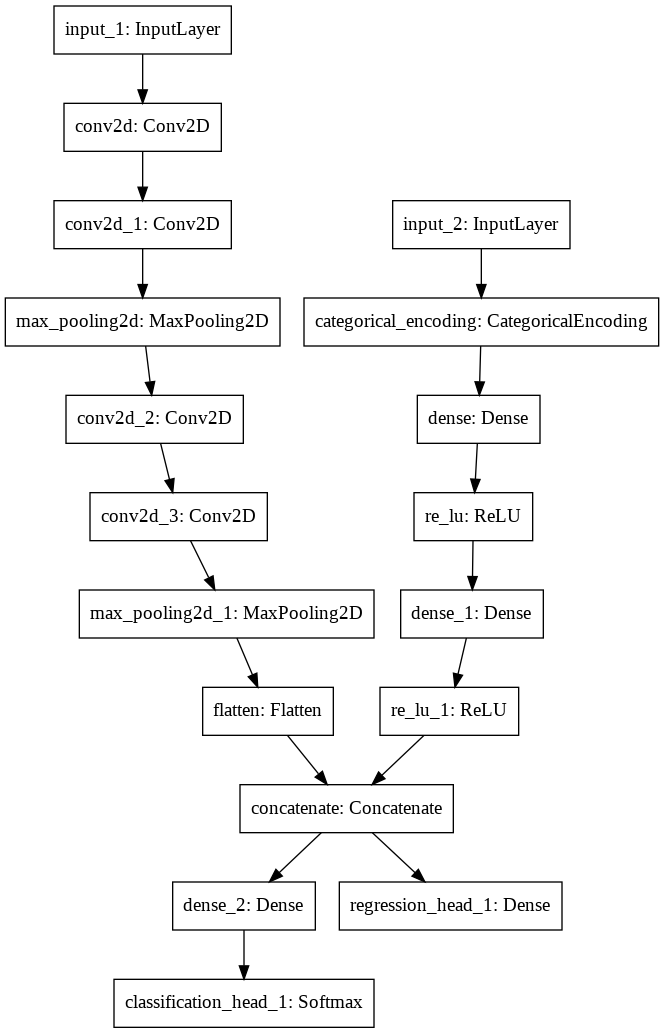

In [0]:
autoKerasMultiModel = clf.export_model()
plot_model(autoKerasMultiModel, 'AutoKeras Multi Best Model.png')

# Summary

This notebook describes AutoKeras, a open source alternative to Google's AutoML to perform automated machine learning and deep learning.

The main idea behind AutoKeras is to enable non machine learning expert to buil neural models for their datasets and allowing them to use this state-of-the-art model in their applications.

AutoKeras uses Neural Architecture serach (NAS) to effectively search a model and tune its hyperparameters to best represent the current dataset. NAS algorithms will automatically:

* Define and optimize a neural network architecture
* Tune the hyperparameters to the model

The primary benefits include:

* Ablity to perform deep learning with little-to-no experience
* Ability to generalize to data outside the training and testing set while obtaining a high accuracy model 
* Simple APi interface which can be understood by anyone.
* A potentially state-of-the-art performance with little effort

Replacing an actual deep learning expert with a NAS algorithm will require many hours of computing to search for optimal parameters which still costs the GPU time but saves the more costly expert time.

AutoKeras and AutoML is inteed a major step in the right direction in support of automated machine learning and deep learning.